In [4]:
import praw
import pandas as pd

In [5]:
CLIENT_ID = "-x"
CLIENT_SECRET = "x"
USER_AGENT = f"python:{CLIENT_ID}:0.1 (by /u/Kolien_)"

In [6]:
# Okay! Now we can create an instance of the api by using this command
api = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT
)

In [7]:
api.read_only

True

In [8]:
submissions = api.subreddit('askReddit').hot(limit = 10)
submissions

In [9]:
submissions = api.subreddit('askReddit').hot(limit = 10)
newlist = []
for submission in submissions:
    newlist.append({
        "title" : submission.title,
        "score" : submission.score,
        "comments" : submission.num_comments
    })

In [10]:
print(newlist)

[{'title': 'What was the cringiest thing you did in your first relationship?', 'score': 28582, 'comments': 11314}, {'title': 'What’s the dumbest thing you’ve heard someone say that made you wonder how they function on a day to day basis?', 'score': 52424, 'comments': 29792}, {'title': 'What is something that HAS aged well?', 'score': 5730, 'comments': 6554}, {'title': 'What is something that MOST adults can do, but you, for whatever reason, cannot pull off?', 'score': 358, 'comments': 682}, {'title': 'What have we all conveniently forgotten about?', 'score': 5503, 'comments': 5167}, {'title': 'What made you laugh the hardest in your entire life?', 'score': 8226, 'comments': 3965}, {'title': 'What is the worst thing to cheap out on?', 'score': 650, 'comments': 918}, {'title': "What is the most physically painful thing you've ever gone through?", 'score': 373, 'comments': 818}, {'title': "Men of reddit, what do women do that they think is sexy, but actually isn't?", 'score': 778, 'commen

In [11]:
df = pd.DataFrame(newlist)
df.head()

,comments,score,title
0,11314,28582,What was the cringiest thing you did in your f...
1,29792,52424,What’s the dumbest thing you’ve heard someone ...
2,6554,5730,What is something that HAS aged well?
3,682,358,"What is something that MOST adults can do, but..."
4,5167,5503,What have we all conveniently forgotten about?


In [12]:
df.to_json("exercise_redditKolien.json")

In [13]:
df = pd.read_json("exercise_redditKolien.json")

In [14]:
df.head(5)

,comments,score,title
0,11314,28582,What was the cringiest thing you did in your f...
1,29792,52424,What’s the dumbest thing you’ve heard someone ...
2,6554,5730,What is something that HAS aged well?
3,682,358,"What is something that MOST adults can do, but..."
4,5167,5503,What have we all conveniently forgotten about?


In [15]:
df.plot(kind = "hist", y = "score", bins = 10)

   comments  score                                              title
1     29792  52424  What’s the dumbest thing you’ve heard someone ...
0     11314  28582  What was the cringiest thing you did in your f...
5      3965   8226  What made you laugh the hardest in your entire...
2      6554   5730              What is something that HAS aged well?
4      5167   5503     What have we all conveniently forgotten about?
9      4938   5024  What's an experience you don't ever want to go...
8      1655    778  Men of reddit, what do women do that they thin...
6       918    650           What is the worst thing to cheap out on?
7       818    373  What is the most physically painful thing you'...
3       682    358  What is something that MOST adults can do, but...


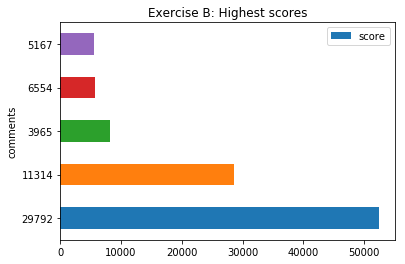

In [16]:
sort_high = df.sort_values("score", ascending = False)
print(sort_high)
highest = df["score"].max()
sort_high[0:5].plot(y = "score", x = "comments", kind = "barh", title = "Exercise B: Highest scores")

In [17]:
print(highest)

52424


In [18]:
allscores = df.score.sum()
print(allscores)

107648


In [19]:
pielist = [allscores, highest]
print(pielist)
new_dataframe = pd.DataFrame(pielist)
print(new_dataframe)

[107648, 52424]
        0
0  107648
1   52424


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c773048>],
      dtype=object)

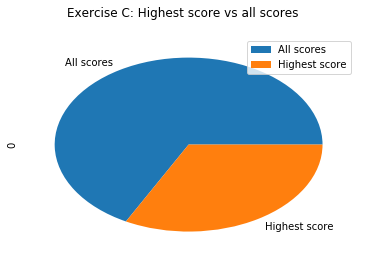

In [20]:
new_dataframe.index = ['All scores', 'Highest score']
new_dataframe.plot.pie(subplots=True, title = "Exercise C: Highest score vs all scores")

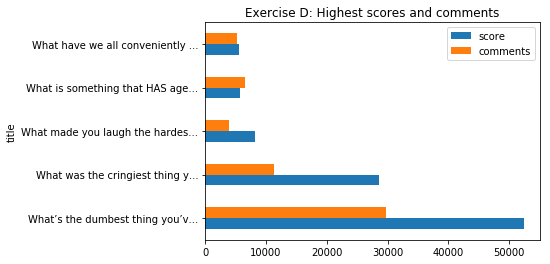

In [23]:
sort_high['title'] = sort_high['title'].apply(lambda x: x[0:30]) + "..."

sort_high[0:5].plot(y = ["score", "comments"], x = "title", kind = "barh", title = "Exercise D: Highest scores and comments")